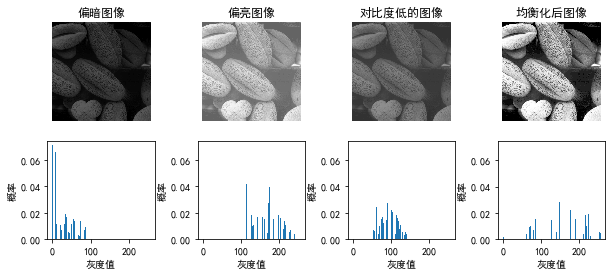

<Figure size 432x288 with 0 Axes>

In [2]:
import numpy as np
import cv2
import matplotlib.pyplot as plt
%matplotlib inline
%config InlinBackend.figure_format="retina"
plt.rcParams['font.sans-serif']=['SimHei'] #用来正常显示中文标签
plt.rcParams['axes.unicode_minus']=False #用来正常显示负

#图像直方图
def histogram(image):
    (row, col) = image.shape
    #创建长度为256的list
    hist = [0]*256
    for i in range(row):
        for j in range(col):
            hist[image[i,j]] += 1
    hist=hist/np.sum(hist)   #这里一定要用np.sum，python的列表不是直接除以一个整数
    return hist
def global_linear_transmation(im,c=0,d=255):
    img=im.copy()
    maxV = img.max()
    minV = img.min()
    if maxV==minV:
        return np.uint8(img)
    for i in range(img.shape[0]):
        for j in range(img.shape[1]):
            img[i, j] = ((d-c) / (maxV - minV)) * (img[i, j] - minV)+c#img[i,j]代表的是某像素点三通道的值
    return np.uint8(img)

if __name__=="__main__":
    img = cv2.imread(r'..\img\rice.tif',0)
    img1=global_linear_transmation(img,0,100)
    img2=global_linear_transmation(img,100,255)
    img3=global_linear_transmation(img,50,150)    
    img4 = cv2.equalizeHist(img)
    h1=histogram(img1)
    h2=histogram(img2)
    h3=histogram(img3)
    h4=histogram(img4)
    
    plt.figure(figsize=(10,4))
    plt.subplots_adjust(left=None, bottom=None, right=None, \
                    top=None,wspace=0.4, hspace=0.2)
    plt.subplot(241)
    plt.title("偏暗图像")
    plt.axis("off")
    plt.imshow(img1,vmin=0, vmax=255,cmap =plt.cm.gray)
    plt.subplot(242)
    plt.title("偏亮图像")
    plt.axis("off")
    plt.imshow(img2,vmin=0, vmax=255,cmap =plt.cm.gray)
    plt.subplot(243)
    plt.title("对比度低的图像")
    plt.axis("off")
    plt.imshow(img3,vmin=0, vmax=255,cmap =plt.cm.gray)
    plt.subplot(244)
    plt.title("均衡化后图像")
    plt.axis("off")
    plt.imshow(img4,vmin=0, vmax=255,cmap =plt.cm.gray)  
    plt.subplot(245)
#     plt.title("偏暗直方图")
    plt.bar(range(256),h1)
    plt.xlabel("灰度值")
    plt.ylabel("概率")
#     plt.ylim(0,0.05)
    plt.subplot(246)
#     plt.title("偏亮直方图")
    plt.bar(range(256),h2)
    plt.xlabel("灰度值")
    plt.ylabel("概率")
#     plt.ylim(0,0.05)    
    plt.subplot(247)
#     plt.title("对比度低图像直方图")
    plt.bar(range(256),h3)
    plt.xlabel("灰度值")
    plt.ylabel("概率")
#     plt.ylim(0,0.05)
    plt.subplot(248)
#     plt.title("均衡化后直方图")
    plt.bar(range(256),h4)
    plt.xlabel("灰度值")
    plt.ylabel("概率")
#     plt.ylim(0,0.05)
    plt.show()
    plt.savefig("ch03-20_equ.jpg")